In [1]:
import warnings

warnings.simplefilter(action='ignore', category=Warning)


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_excel('../input/trademarkrejctdecision/extracted__v10.xlsx', sheet_name='Sheet1')

column_mapping = {
    'brandName': 'brandName',
    'ID': 'ID',
    'content': 'content',
    'cited_brand_number': 'cited_brand_number',
    'cited_brand_name': 'cited_brand_name',
    'rejection_result': 'rejection_result',
    'legal_basis': 'legal_basis',
    'rejected_goods': 'rejected_goods',
    'passed_goods': 'passed_goods',
    '评审文书号': 'review_document_number',
    '申请人': 'applicant',
    '委托代理人': 'authorized_agent',
    '申请人复审的主要理由': 'main_reason_for_review_by_applicant',
    '申请人在复审程序中提交': 'submissions_in_review_procedure',
    '经审理查明': 'findings_after_review',
    '使用法条': 'legal_articles_used',
    '驳回复审结果': 'review_rejection_result',
    '裁定日期': 'ruling_date'
}

# Rename the columns in the dataframe
data = data.rename(columns=column_mapping)

In [3]:
# Checking for missing values in each column
missing_values = data.isnull().sum()

missing_values_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

missing_data.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
submissions_in_review_procedure,18409,99.729129
rejected_goods,16780,90.904166
passed_goods,16751,90.747061
main_reason_for_review_by_applicant,12108,65.594019
findings_after_review,9875,53.496939
cited_brand_name,8450,45.777128
cited_brand_number,8444,45.744623
legal_basis,753,4.079311
legal_articles_used,753,4.079311
authorized_agent,745,4.035972


In [4]:
# 1. Drop columns with more than 90% missing values
cols_to_drop = missing_data[missing_data['Percentage'] > 90].index.tolist()
data_cleaned = data.drop(columns=cols_to_drop)

# 2. Fill missing values
# For simplicity, we are treating all columns as non-numeric. So, we will fill them with '未知'
data_cleaned.fillna('-1', inplace=True)

# 3. Drop potential data leakage columns
# As mentioned, the exact names of these columns in the provided dataset aren't clear due to encoding.
# We will drop the column "legal_basis" (which seems to correspond to one of the mentioned columns).
data_cleaned = data_cleaned.drop(columns=['legal_basis'])
data_cleaned = data_cleaned[data_cleaned['rejection_result'] != '-1']
# Display the cleaned data
data_cleaned.head()

,brandName,ID,content,cited_brand_number,cited_brand_name,rejection_result,review_document_number,applicant,authorized_agent,main_reason_for_review_by_applicant,findings_after_review,legal_articles_used,review_rejection_result,ruling_date
0,逆光视线 Backlighting Photography Studio,63305423,关于第63305423号“逆光视线 Backlighting\nPhotography ...,-1,-1,予以驳回,商评字[2023]第0000166255号,逆光视线（北京）文化传播有限公司,北京辰友国际知识产权代理有限公司,申请商标经长期使用已具有知名度，与驳回决定引证的第9108946号商标（以下称引证商标）不构...,1.引证商标因注册期满未续展已丧失商标专用权，该商标已不构成申请商标获准注册的在先权利障碍。...,第十九条第四款、第三十条和第三十四条,申请商标在第16类复审商品上的注册申请予以驳回,2022年8月31日
1,SICUREZZA STARK PORTE BLINDATE-SECURITY DOORS,65907851,关于第65907851号“SICUREZZA STARK\nPORTE BLINDATE...,"32798812,6808018,1190439,36410306,46479828,122...","完全,STARK,STARK,STARK MATERIAL,STARK METAL FRAM...",予以驳回,商评字[2023]第0000172578号,上海博邦实业有限公司,北京厚邦知识产权代理有限公司,申请商标为申请人独创，与驳回决定中引证的第32798812号“完全”商标（以下称引证商标一）...,-1,第三十条、第三十一条和第三十四条,申请商标在复审商品上的注册申请予以驳回,2023年06月21日
2,名页生态 MINGYESHENGTAI及图,65713766,关于第65713766号“名页生态\nMINGYESHENGTAI及图”商标驳回复审决定...,-1,-1,予以驳回,商评字[2023]第0000174851号,内蒙古名页生态农业发展有限公司,河北诚鼎知识产权代理有限公司,-1,-1,第十条第一款第（七）项、第三十条和第三十四条,申请商标在复审服务上的注册申请予以驳回,2023年06月25日
3,MY MILLENNIUM PRESTIGE,65480461,关于第65480461号“MY MILLENNIUM\nPRESTIGE”商标驳回复审决...,-1,-1,予以驳回,商评字[2023]第0000174386号,千禧国敦国际有限公司,北京华沛德权律师事务所,申请商标是申请人在先商标的延伸注册，其他“PRESTIGE”商标已获准注册，故申请商标具有显...,-1,第十一条第一款第（三）项、第三十条和第三十四条,申请商标在复审服务上的注册申请予以驳回,2023年06月25日
4,SR 叁人闯 THREE PEOPLE RUSH,65469069,关于第65469069号“SR 叁人闯 THREE PEOPLE\nRUSH”商标驳回复...,28184492,CSR,予以驳回,商评字[2023]第0000188061号,沈来,北京知橙网知识产权代理有限公司,-1,-1,第三十条和第三十四条,申请商标在复审服务上的注册申请予以驳回,2023年06月29日


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine the two columns for TF-IDF vectorization
combined_texts = data_cleaned['brandName'].astype(str) + data_cleaned['cited_brand_name'].astype(str)

# Vectorize the combined texts
vectorizer = TfidfVectorizer()
# Fit the vectorizer on combined texts
vectorizer.fit(combined_texts)

# Transform the brand_name and cited_name columns individually using the fitted vectorizer
brandName_matrix = vectorizer.transform(data_cleaned['brandName'].astype(str))
cited_brand_name_matrix = vectorizer.transform(data_cleaned['cited_brand_name'].astype(str))

brandName_matrix.shape, cited_brand_name_matrix.shape

# Compute the cosine similarity between the two sets of vectors
similarities = cosine_similarity(brandName_matrix, cited_brand_name_matrix)
# Since cosine_similarity returns a matrix, we take the diagonal which gives the similarity of each pair
similarity_scores = similarities.diagonal()

# Add the similarity scores to the dataframe as a new column
data_cleaned['similarity_score'] = similarity_scores

# Display the first few rows of the data with the new column
data_cleaned[['similarity_score','brandName', 'cited_brand_name' ]].head()


,similarity_score,brandName,cited_brand_name
0,0.000000,逆光视线 Backlighting Photography Studio,-1
1,0.342607,SICUREZZA STARK PORTE BLINDATE-SECURITY DOORS,"完全,STARK,STARK,STARK MATERIAL,STARK METAL FRAM..."
2,0.000000,名页生态 MINGYESHENGTAI及图,-1
3,0.000000,MY MILLENNIUM PRESTIGE,-1
4,0.000000,SR 叁人闯 THREE PEOPLE RUSH,CSR


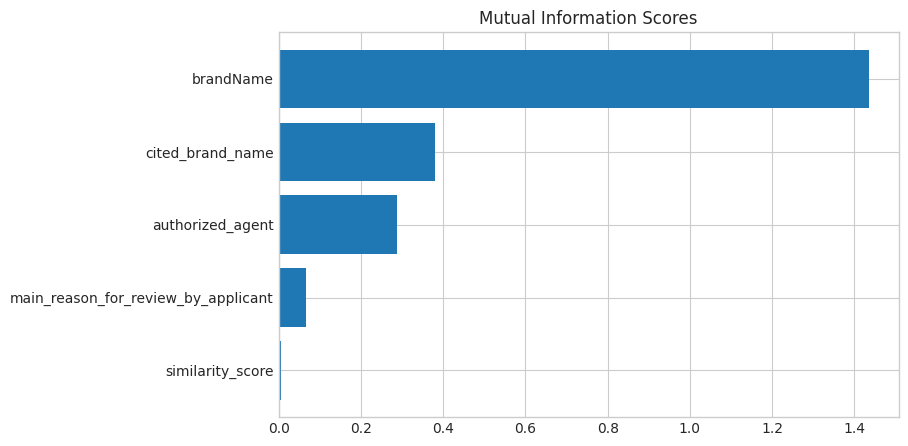

(brandName                              1.435663
 cited_brand_name                       0.380099
 authorized_agent                       0.287010
 main_reason_for_review_by_applicant    0.067737
 similarity_score                       0.005495
 Name: MI Scores, dtype: float64,
 brandName                              1.435663
 main_reason_for_review_by_applicant    0.067737
 Name: MI Scores, dtype: float64)

In [6]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
# Set the similarity_score to NaN for rows where similarity is 0
data_cleaned.loc[data_cleaned['similarity_score'] == 0, 'similarity_score'] = np.nan

# Fill NaN values in similarity_score with its mean，median，mode_similarity
# mean_similarity = data_cleaned['similarity_score'].mean()
# data_cleaned['similarity_score'].fillna(mean_similarity, inplace=True)

# median_similarity = data_cleaned['similarity_score'].median()
# data_cleaned['similarity_score'].fillna(median_similarity, inplace=True)

mode_similarity = data_cleaned['similarity_score'].mode()[0]  # mode() 返回一个Series，因此我们选择第一个值
data_cleaned['similarity_score'].fillna(mode_similarity, inplace=True)


mapping = {
    '予以驳回': 0,
    '予以初步审定': 1,
    '部分驳回': 2
}


# Selected features
selected_features = ['similarity_score', 'brandName', 'cited_brand_name',  'authorized_agent', 'main_reason_for_review_by_applicant']
MI_selected_features = ['similarity_score',  'brandName', 'cited_brand_name'  ,'authorized_agent', 'main_reason_for_review_by_applicant']
# selected_features = ['similarity_score','brandName', 'cited_brand_name', 'applicant', 'authorized_agent', 'applicant复审的主要理由']

# Prepare data for mutual information scoring
MI_X = data_cleaned.drop(columns='rejection_result')
MI_X = MI_X[MI_selected_features]
MI_y = data_cleaned['rejection_result'].map(mapping)

# Encode the categorical columns
for colname in MI_X.select_dtypes("object"):
    MI_X[colname], _ = MI_X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = MI_X.dtypes == int


# Compute mutual information scores
mi_scores = make_mi_scores(MI_X, MI_y, discrete_features[MI_selected_features])
mi_scores_subset = mi_scores[::3]  # show a few features with their MI scores

# Plotting
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.show()

mi_scores,mi_scores_subset

# 文本向量化

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100)

# Define a function to convert text columns to TF-IDF vectors and add them to the dataframe
def convert_to_tfidf_and_add(df, column_name):
    # Convert the column values to string type, fill NaNs with empty strings
    column_values = df[column_name].fillna("").astype(str)
    
    # Fit and transform using the TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(column_values)
    
    # Convert the sparse matrix to dense array
    tfidf_array = tfidf_matrix.toarray()
    
    # Add the TF-IDF vectors to the dataframe as new columns
    for i in range(tfidf_array.shape[1]):
        df[f"{column_name}_tfidf_{i}"] = tfidf_array[:, i]
    
    return df

# Convert the specified columns to TF-IDF vectors and add them to the dataframe
for column in selected_features:
    df = convert_to_tfidf_and_add(data_cleaned, column)
#     df = convert_to_tfidf_and_add(X_train, column)
#     df = convert_to_tfidf_and_add(X_train, column)
# Save the updated dataframe to a new Excel file



output_path = "./processed_data_with_tfidf.xlsx"
df.to_excel(output_path, index=False)
print("success!")

success!


In [8]:
df

,brandName,ID,content,cited_brand_number,cited_brand_name,rejection_result,review_document_number,applicant,authorized_agent,main_reason_for_review_by_applicant,...,main_reason_for_review_by_applicant_tfidf_90,main_reason_for_review_by_applicant_tfidf_91,main_reason_for_review_by_applicant_tfidf_92,main_reason_for_review_by_applicant_tfidf_93,main_reason_for_review_by_applicant_tfidf_94,main_reason_for_review_by_applicant_tfidf_95,main_reason_for_review_by_applicant_tfidf_96,main_reason_for_review_by_applicant_tfidf_97,main_reason_for_review_by_applicant_tfidf_98,main_reason_for_review_by_applicant_tfidf_99
0,逆光视线 Backlighting Photography Studio,63305423,关于第63305423号“逆光视线 Backlighting\nPhotography ...,-1,-1,予以驳回,商评字[2023]第0000166255号,逆光视线（北京）文化传播有限公司,北京辰友国际知识产权代理有限公司,申请商标经长期使用已具有知名度，与驳回决定引证的第9108946号商标（以下称引证商标）不构...,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SICUREZZA STARK PORTE BLINDATE-SECURITY DOORS,65907851,关于第65907851号“SICUREZZA STARK\nPORTE BLINDATE...,"32798812,6808018,1190439,36410306,46479828,122...","完全,STARK,STARK,STARK MATERIAL,STARK METAL FRAM...",予以驳回,商评字[2023]第0000172578号,上海博邦实业有限公司,北京厚邦知识产权代理有限公司,申请商标为申请人独创，与驳回决定中引证的第32798812号“完全”商标（以下称引证商标一）...,...,0.212768,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,名页生态 MINGYESHENGTAI及图,65713766,关于第65713766号“名页生态\nMINGYESHENGTAI及图”商标驳回复审决定...,-1,-1,予以驳回,商评字[2023]第0000174851号,内蒙古名页生态农业发展有限公司,河北诚鼎知识产权代理有限公司,-1,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MY MILLENNIUM PRESTIGE,65480461,关于第65480461号“MY MILLENNIUM\nPRESTIGE”商标驳回复审决...,-1,-1,予以驳回,商评字[2023]第0000174386号,千禧国敦国际有限公司,北京华沛德权律师事务所,申请商标是申请人在先商标的延伸注册，其他“PRESTIGE”商标已获准注册，故申请商标具有显...,...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SR 叁人闯 THREE PEOPLE RUSH,65469069,关于第65469069号“SR 叁人闯 THREE PEOPLE\nRUSH”商标驳回复...,28184492,CSR,予以驳回,商评字[2023]第0000188061号,沈来,北京知橙网知识产权代理有限公司,-1,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18454,速熠素IMPACT oral及图,63527600,关于第63527600号“速熠素IMPACT oral及图”商标\n驳回复审决定书\n商...,-1,-1,予以驳回,商评字[2023]第0000160696号,雀巢产品有限公司,北京顺城凯隆知识产权代理有限公司,申请商标与驳回决定引证的第35442862号、第5类国际注册第1436526S号、第30类国...,...,0.000000,0.0,0.399839,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18455,FORTUNE MPW,62622312,关于第62622312号“FORTUNE MPW”商标\n驳回复审决定书\n商评字[20...,-1,-1,予以驳回,商评字[2023]第0000158344号,财富媒体知识产权有限公司,北京白洲磐华知识产权代理事务所,申请商标使用在指定服务项目上不会使公众产生误认。申请人的“FORTUNE”商标是早已在中国在...,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18456,茵芙莎,55125954,关于第55125954号“茵芙莎”商标\n驳回复审决定书\n商评字[2023]第0000...,34706372,茵芙莎 IPSA,予以初步审定,商评字[2023]第0000167347号,株式会社资生堂,北京联德知识产权代理有限公司,-1,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18457,“鱼,65381682,关于第65381682号““鱼”你乐翻天及图”商标\n驳回复审决定书\n商评字[2023...,"64215563,11722225","京南大物,通威鱼 TONGWEIFISH",予以初步审定,商评字[2023]第0000179049号,温州馨悦文化用品有限公司,河南超人科技有限公司,-1,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Load the dataset
# df = pd.read_excel('../input/trademarkrejctdecision/processed_data_with_tfidf (3).xlsx', sheet_name='Sheet1')


In [10]:

from sklearn.model_selection import train_test_split

# Define the features and the target
X = df.drop(columns=['rejection_result'])
Y = df['rejection_result']



# Split the data into train, validation, and test sets
# Using 70% for training, 15% for validation, and 15% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# # Select the specified features and target
# selected_features = ['brandName', 'cited_brand_name', 'applicant', 'authorized_agent', 'applicant复审的主要理由']
# X_train = X_train[selected_features].fillna('')
# X_valid = X_valid[selected_features].fillna('')
# X_test = X_test[selected_features].fillna('')


# Map the 'rejection_result' column to its corresponding numerical labels
mapping = {
    '予以驳回': 0,
    '予以初步审定': 1,
    '部分驳回': 2
}

y_train = y_train.map(mapping)
y_valid = y_valid.map(mapping)
y_test = y_test.map(mapping)

X_train.shape, X_valid.shape, X_test.shape,X_train.head()

((12919, 514),
 (2768, 514),
 (2769, 514),
                         brandName        ID  \
 1237                           鎏鑫  65315766   
 18053                          酷滋  55646414   
 2060                       BRONNY  63261422   
 881    三葉·满堂红 三叶食品 Sangye  Food及图  64133033   
 3307                        KNORR  62193825   
 
                                                  content  \
 1237     关于第65315766号“鎏鑫”商标\n驳回复审决定书\n商评字[2023]第00001...   
 18053    关于第55646414号“酷滋”商标\n驳回复审决定书\n商评字[2022]第00000...   
 2060     关于第63261422号“BRONNY”商标\n驳回复审决定书\n商评字[2023]第0...   
 881      关于第64133033号“三葉·满堂红 三叶食品 Sangye\nFood及图”商标驳回...   
 3307     关于第62193825号“KNORR”商标\n驳回复审决定书\n商评字[2023]第00...   
 
              cited_brand_number                    cited_brand_name  \
 1237                         -1                                  -1   
 18053                        -1                                  -1   
 2060                         -1                                  -1   
 881    133

## 预处理
分类变量:删除高基数(为了one-hot encoding)
one-hot encoding (`get_dummies`)

In [11]:
# Select numeric columns
numeric_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
numeric_cols 
X_train.columns

Index(['brandName', 'ID', 'content', 'cited_brand_number', 'cited_brand_name',
       'review_document_number', 'applicant', 'authorized_agent',
       'main_reason_for_review_by_applicant', 'findings_after_review',
       ...
       'main_reason_for_review_by_applicant_tfidf_90',
       'main_reason_for_review_by_applicant_tfidf_91',
       'main_reason_for_review_by_applicant_tfidf_92',
       'main_reason_for_review_by_applicant_tfidf_93',
       'main_reason_for_review_by_applicant_tfidf_94',
       'main_reason_for_review_by_applicant_tfidf_95',
       'main_reason_for_review_by_applicant_tfidf_96',
       'main_reason_for_review_by_applicant_tfidf_97',
       'main_reason_for_review_by_applicant_tfidf_98',
       'main_reason_for_review_by_applicant_tfidf_99'],
      dtype='object', length=514)

## 构造管道pipeline

In [12]:
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer


# Custom TF-IDF transformer
class TfidfEmbedding(TransformerMixin):
    def __init__(self, max_features=100):
        self.max_features = max_features
        self.vectorizer = TfidfVectorizer(max_features=self.max_features)
        
    def fit(self, X, y=None):
        # Since X is a DataFrame, we take the first column, 
        # assuming this transformer will be used on one column at a time
        self.vectorizer.fit(X.iloc[:, 0])
        return self

    def transform(self, X):
        return self.vectorizer.transform(X.iloc[:, 0]).toarray()


In [13]:
from transformers import BertTokenizer, BertModel
import torch

class BertEmbedding(TransformerMixin):
    def __init__(self, model_name="bert-base-chinese"):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)

    def fit(self, X, y=None):
        # This transformer does not need fitting, just return self
        return self

    def transform(self, X):
        embeddings = []
        for text in X.iloc[:, 0]:
            inputs = self.tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
            with torch.no_grad():
                emb = self.model(**inputs).last_hidden_state[:, 0, :].numpy()
                embeddings.append(emb)
        return np.vstack(embeddings)


In [14]:
import tensorflow as tf
import tensorflow_hub as hub

class BertEmbedding(TransformerMixin):
    def __init__(self,  model_path="/kaggle/input/bert/tensorflow2/zh-preprocess/3"):
#         options = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
#         self.preprocessor = hub.KerasLayer(model_path, options=options)
        self.preprocessor = hub.KerasLayer(model_path)

    def fit(self, X, y=None):
        # This transformer does not need fitting, just return self
        return self

    def transform(self, X):
        embeddings = []
        for text in X.iloc[:, 0]:
            text_input = tf.constant([text])
            encoder_inputs = self.preprocessor(text_input)
            embeddings.append(encoder_inputs["input_word_ids"].numpy().flatten())
        return np.array(embeddings)


In [15]:
from transformers import AutoTokenizer, AutoModel
import torch

class LlamaEmbedding(TransformerMixin):
    def __init__(self, model_path):
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModel.from_pretrained(model_path)

    def fit(self, X, y=None):
        # This transformer does not need fitting, just return self
        return self

    def transform(self, X):
        embeddings = []
        for text in X.iloc[:, 0]:
            inputs = self.tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
            with torch.no_grad():
                emb = self.model(**inputs).last_hidden_state[:, 0, :].numpy()
                embeddings.append(emb)
        return np.vstack(embeddings)


In [16]:

from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBRegressor,XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# # # Text columns to be transformed
# text_transformer = Pipeline(steps=[
#     ('tfidf', TfidfEmbedding())
# ])

# Assuming you've the Llama model loaded locally
# model_path = "../input/llama-2/pytorch/70b-chat-hf/1"
# model_path ="../input/bert/tensorflow2/zh-preprocess/3"

# # Text columns to be transformed using Llama
# text_transformer = Pipeline(steps=[
#     ('llama', LlamaEmbedding(model_path=model_path))
# ])

# Text columns to be transformed using Bert
# text_transformer = Pipeline(steps=[
#     ('bert', BertEmbedding())
# ])

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical data only, as categorical data has already been preprocessed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
#         ('text', text_transformer, 'brandName'),  # Example for 'brandName'. Repeat for other text columns if needed.
#        ('text', text_transformer, 'cited_brand_name'),
#         ('text', text_transformer, 'applicant'),
#         ('text', text_transformer, 'authorized_agent'),
#         ('text', text_transformer, 'applicant复审的主要理由'),
    ])


# Define model
# model = XGBRegressor(n_jobs=-1) # 用于回归问题，也就是预测一个连续的输出值。
model = XGBClassifier(n_jobs=-1,tree_method='gpu_hist', gpu_id=0) # 用于分类问题，也就是预测输入数据属于哪个类别。

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])






# 手动设置参数

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

model = XGBClassifier(n_jobs=-1, 
                     n_estimators=900, 
                     learning_rate=0.1,tree_method='gpu_hist', gpu_id=0)

# 重新定义管道
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# 在训练集上拟合管道
my_pipeline.fit(X_train, y_train)


# 在验证集上评估模型
validation_score = my_pipeline.score(X_valid, y_valid)
print(validation_score)

# Get predictions
y_pred_valid = my_pipeline.predict(X_valid)


# Accuracy, Recall, and F1 Score for validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
report_valid = classification_report(y_valid, y_pred_valid)

print("accuracy_valid:",accuracy_valid)
print( "report_valid:\n",report_valid)

# 交叉验证 Evaluate the model using cross_val_score
# Define custom scorer for cross_val_score
scorer = make_scorer(accuracy_score)
# Use cross_val_score with accuracy as the metric
cross_val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring=scorer)

print("Cross-validation scores: ", cross_val_scores.mean(), cross_val_scores.std())


y_pred_test = my_pipeline.predict(X_test)

# Accuracy, Recall, and F1 Score for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("accuracy_test:",accuracy_test)

print("report_test:\n",report_test)



0.6723265895953757
accuracy_valid: 0.6723265895953757
report_valid:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79      1773
           1       0.62      0.27      0.38       727
           2       0.33      0.10      0.15       268

    accuracy                           0.67      2768
   macro avg       0.55      0.43      0.44      2768
weighted avg       0.64      0.67      0.62      2768

Cross-validation scores:  0.6820958721528835 0.00578896019205888
accuracy_test: 0.6803900325027086
report_test:
               precision    recall  f1-score   support

           0       0.68      0.94      0.79      1713
           1       0.71      0.31      0.43       803
           2       0.41      0.10      0.16       253

    accuracy                           0.68      2769
   macro avg       0.60      0.45      0.46      2769
weighted avg       0.67      0.68      0.63      2769



<Figure size 7500x7500 with 0 Axes>

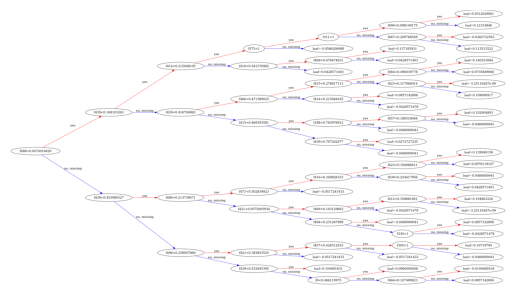

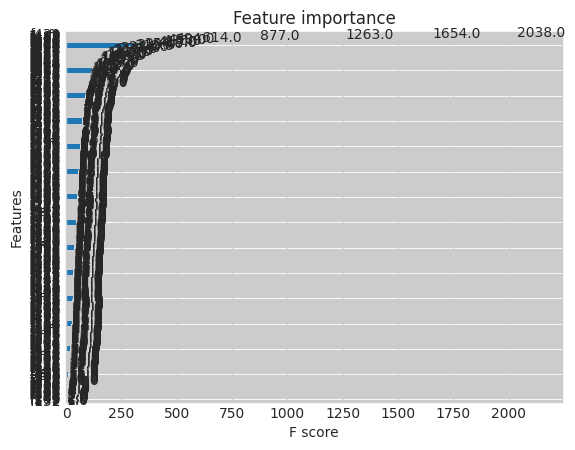

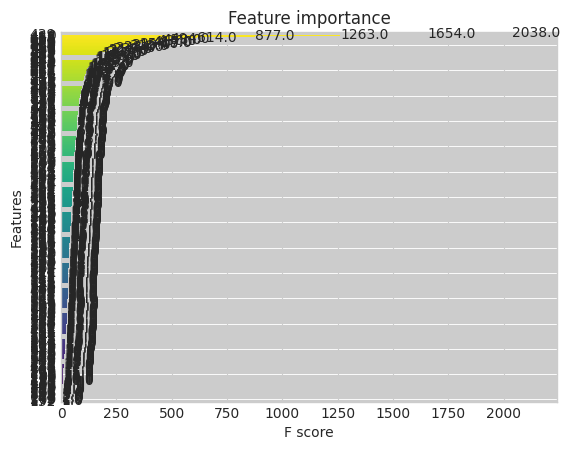

In [18]:
# 可解释性
from xgboost import plot_tree,plot_importance
import matplotlib.pyplot as plt
import numpy as np
# 可视化单棵树
plt.figure(figsize=(25, 25), dpi=300)  #设置图像大小，20x20单位是英寸 设置dpi为300
plot_tree(model, num_trees=0, rankdir='LR')
plt.savefig('./tree_gridsearchcv.png', format='png', dpi=300)  # 保存为高分辨率的png文件

plt.show()

# 可视化特征重要性
plot_importance(model)
plt.show()

import xgboost as xgb
# 使用plot_importance获取特征重要性的数据
ax = xgb.plot_importance(model, importance_type='weight', color='white')
ylocs, ylabels = plt.yticks()
# 获取特征名和其重要性值
labels = [label.get_text().split('f')[1] for label in ylabels]
values = [model.get_booster().get_score(importance_type='weight')['f'+label] for label in labels]

# 使用不同的颜色绘制条形图
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
plt.barh(ylocs, values, align='center', color=colors, ecolor=None, capsize=0)
plt.yticks(ylocs, labels)
plt.show()

Length of feature_importance: 501
Length of X.columns: 514


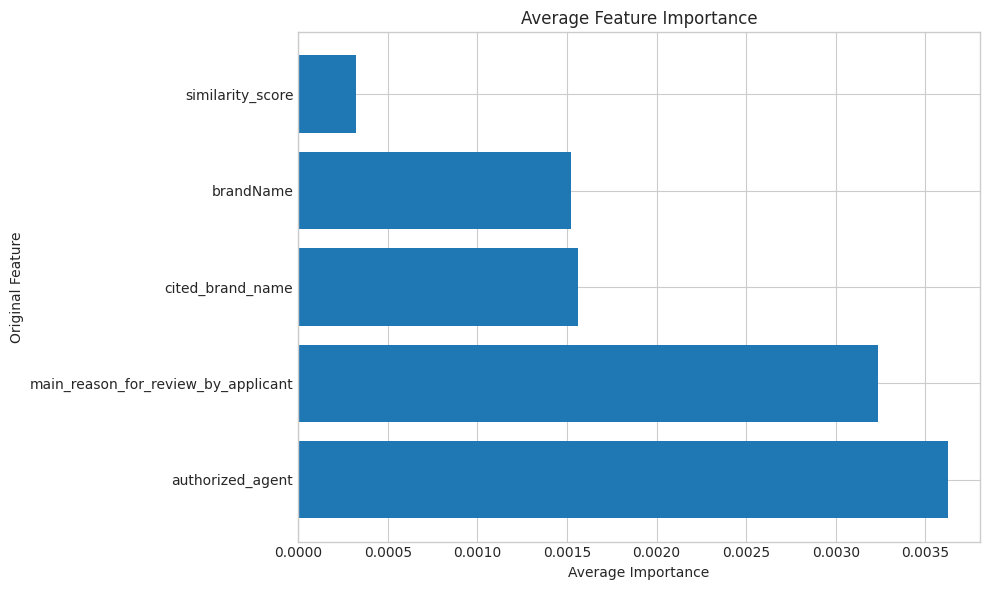

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# 1. Feature importance

feature_importance = model.feature_importances_
print("Length of feature_importance:", len(feature_importance))
print("Length of X.columns:", len(X.columns))

# Assuming selected_features is the list of original features
feature_groups = {feature: [col for col in X.columns if col.startswith(feature)] for feature in selected_features}
average_importance = {}

for feature, columns in feature_groups.items():
    indices = [X.columns.get_loc(col) for col in columns if X.columns.get_loc(col) < len(feature_importance)]
    if indices:  # Ensure there are valid indices
        avg_importance = feature_importance[indices].mean()
        average_importance[feature] = avg_importance

# Getting the sorted features based on their average importance
sorted_features = sorted(average_importance, key=average_importance.get, reverse=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, [average_importance[feature] for feature in sorted_features])
plt.xlabel("Average Importance")
plt.ylabel("Original Feature")
plt.title("Average Feature Importance")
plt.tight_layout()
plt.show()

In [20]:
# Preprocessing of test data, fit model
y_pred = my_pipeline.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'Decision_pred': y_pred})
output.to_csv('submission_mannual.csv', index=False)

# 保存模型到文件
model.save_model('./xgboost_classification_model_mannual.json')

# 如果你想要加载模型
# loaded_model = xgb.XGBClassifier()
# loaded_model.load_model('xgboost_classification_model.json')

# GridSearchCV寻找最优参数

In [21]:
# Define parameter grid
param_grid = {
    'model__n_estimators': [100*i for i in range(1,11)],
    'model__learning_rate': [0.01*i for i in range(1,10)],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring=scorer)

# print(low_cardinality_cols)
# print(numeric_cols)
# print(X_train.columns)


# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'model__learning_rate': 0.07, 'model__n_estimators': 800}


In [22]:
grid_search.best_params_

{'model__learning_rate': 0.07, 'model__n_estimators': 800}

## 自动设置参数

In [23]:
from sklearn.metrics import mean_absolute_error
# 使用最佳参数重新定义模型
best_params = grid_search.best_params_
# best_params ={'model__learning_rate': 0.07, 'model__n_estimators': 400}
model = XGBClassifier(n_jobs=-1, 
                     n_estimators=best_params['model__n_estimators'], 
                     learning_rate=best_params['model__learning_rate'])

# 重新定义管道
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# 在训练集上拟合管道
my_pipeline.fit(X_train, y_train)

# 在验证集上评估模型
validation_score = my_pipeline.score(X_valid, y_valid)
print(validation_score)

# Get predictions
y_pred_valid = my_pipeline.predict(X_valid)


# Accuracy, Recall, and F1 Score for validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
report_valid = classification_report(y_valid, y_pred_valid)

print("accuracy_valid:",accuracy_valid)
print( "report_valid:\n",report_valid)

# 交叉验证 Evaluate the model using cross_val_score
# Define custom scorer for cross_val_score
scorer = make_scorer(accuracy_score)
# Use cross_val_score with accuracy as the metric
cross_val_scores = cross_val_score(my_pipeline, X_train, y_train, cv=5, scoring=scorer)

print("Cross-validation scores: ", cross_val_scores.mean(), cross_val_scores.std())


y_pred_test = my_pipeline.predict(X_test)

# Accuracy, Recall, and F1 Score for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("accuracy_test:",accuracy_test)

print("report_test:\n",report_test)



0.6766618497109826
accuracy_valid: 0.6766618497109826
report_valid:
               precision    recall  f1-score   support

           0       0.69      0.94      0.79      1773
           1       0.63      0.26      0.36       727
           2       0.40      0.07      0.13       268

    accuracy                           0.68      2768
   macro avg       0.57      0.42      0.43      2768
weighted avg       0.64      0.68      0.62      2768

Cross-validation scores:  0.6845727122684762 0.005808607468342038
accuracy_test: 0.6796677500902853
report_test:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79      1713
           1       0.72      0.30      0.42       803
           2       0.41      0.08      0.13       253

    accuracy                           0.68      2769
   macro avg       0.61      0.44      0.45      2769
weighted avg       0.67      0.68      0.62      2769



# 保存

In [24]:
# Preprocessing of test data, fit model
y_pred = my_pipeline.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'Decision_pred': y_pred})
output.to_csv('submission_gridsearchcv.csv', index=False)

# 保存模型到文件
model.save_model('./xgboost_classification_model_gridsearchcv.json')

# 如果你想要加载模型
# loaded_model = xgb.XGBClassifier()
# loaded_model.load_model('xgboost_classification_model.json')

# 模型性能可视化

* 特征重要性：显示模型中每个特征的重要性。
* 混淆矩阵：显示模型的真实标签和预测标签之间的关系。
* ROC曲线和AUC：对于二分类问题，显示模型的性能。
* 准确率、召回率和F1分数的比较：这些指标可以帮助您了解模型的性能。


<Figure size 7500x7500 with 0 Axes>

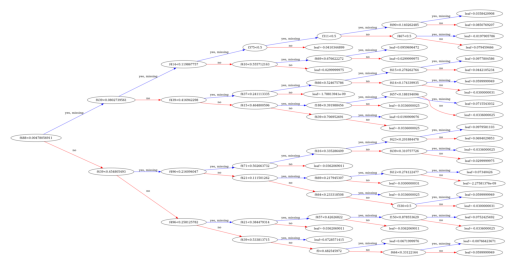

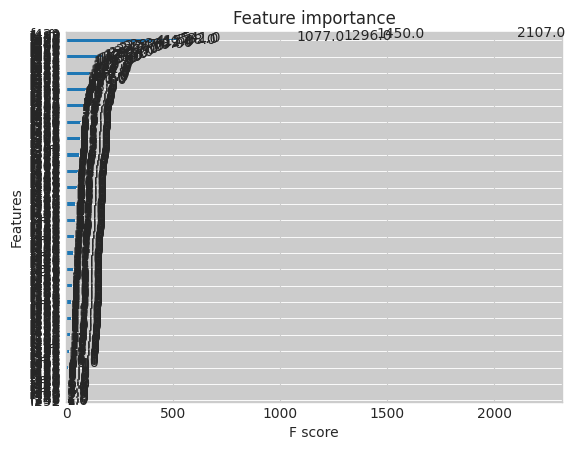

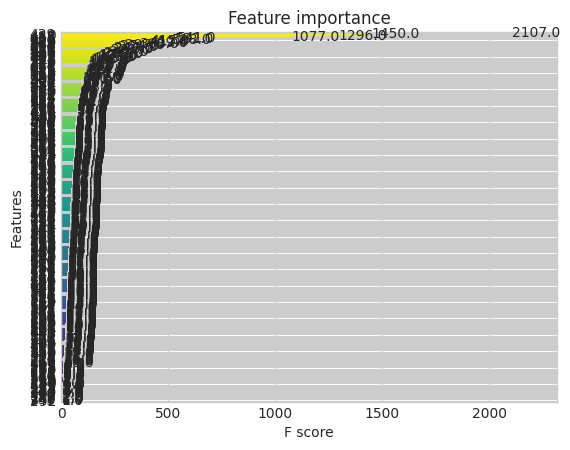

In [25]:
# 可解释性
from xgboost import plot_tree,plot_importance
import matplotlib.pyplot as plt
import numpy as np
# 可视化单棵树
plt.figure(figsize=(25, 25), dpi=300)  #设置图像大小，20x20单位是英寸 设置dpi为300
plot_tree(model, num_trees=0, rankdir='LR')
plt.savefig('./tree_gridsearchcv.png', format='png', dpi=300)  # 保存为高分辨率的png文件

plt.show()

# 可视化特征重要性
plot_importance(model)
plt.show()

import xgboost as xgb
# 使用plot_importance获取特征重要性的数据
ax = xgb.plot_importance(model, importance_type='weight', color='white')
ylocs, ylabels = plt.yticks()
# 获取特征名和其重要性值
labels = [label.get_text().split('f')[1] for label in ylabels]
values = [model.get_booster().get_score(importance_type='weight')['f'+label] for label in labels]

# 使用不同的颜色绘制条形图
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
plt.barh(ylocs, values, align='center', color=colors, ecolor=None, capsize=0)
plt.yticks(ylocs, labels)
plt.show()

Length of feature_importance: 501
Length of X.columns: 514


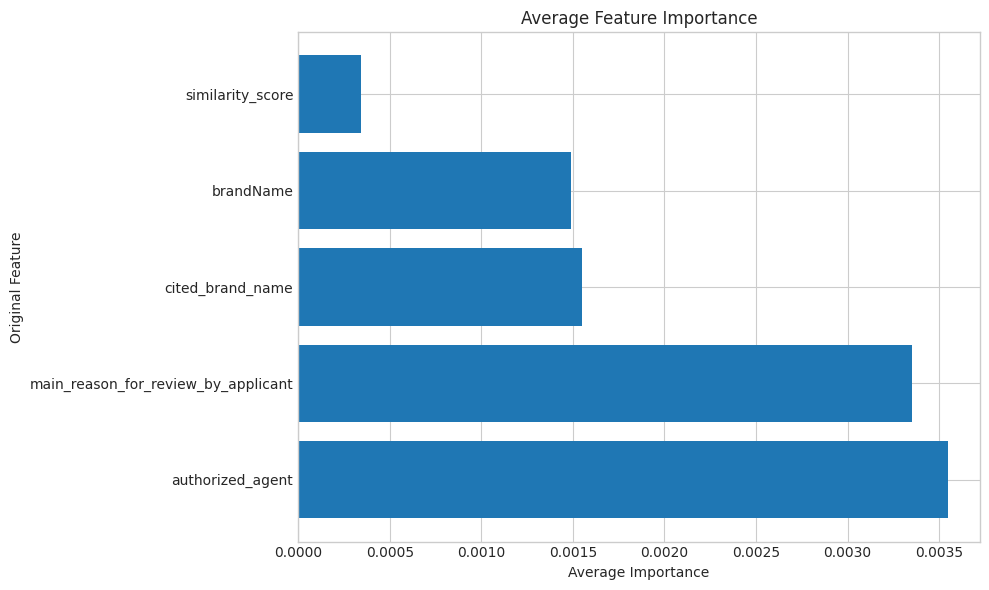

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# 1. Feature importance

feature_importance = model.feature_importances_
print("Length of feature_importance:", len(feature_importance))
print("Length of X.columns:", len(X.columns))

# Assuming selected_features is the list of original features
feature_groups = {feature: [col for col in X.columns if col.startswith(feature)] for feature in selected_features}
average_importance = {}

for feature, columns in feature_groups.items():
    indices = [X.columns.get_loc(col) for col in columns if X.columns.get_loc(col) < len(feature_importance)]
    if indices:  # Ensure there are valid indices
        avg_importance = feature_importance[indices].mean()
        average_importance[feature] = avg_importance

# Getting the sorted features based on their average importance
sorted_features = sorted(average_importance, key=average_importance.get, reverse=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, [average_importance[feature] for feature in sorted_features])
plt.xlabel("Average Importance")
plt.ylabel("Original Feature")
plt.title("Average Feature Importance")
plt.tight_layout()
plt.show()

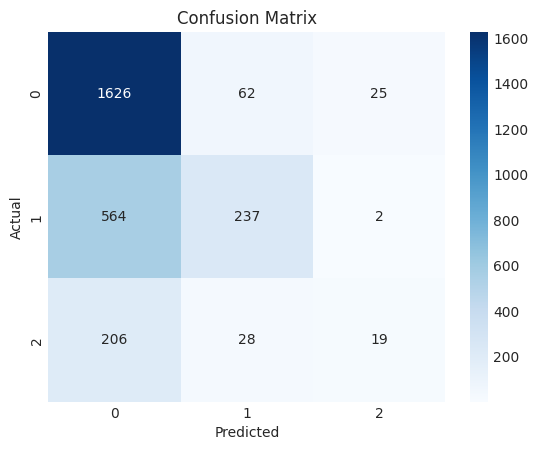

In [27]:



# 2. Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



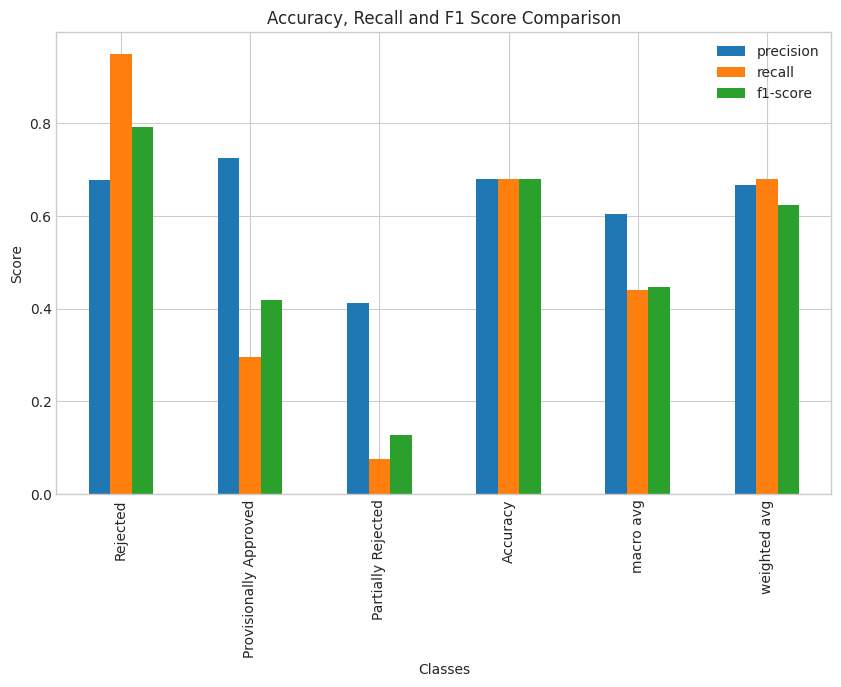

In [28]:
# 4. Accuracy, Recall, and F1 Score comparison
import matplotlib.pyplot as plt

# Reverse mapping from numerical to English semantic representation
reverse_mapping_english_updated = {
    '0': 'Rejected',
    '1': 'Provisionally Approved',
    '2': 'Partially Rejected',
    'accuracy': 'Accuracy'
}

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Select the desired metrics
selected_metrics = metrics_df.loc[:, ['precision', 'recall', 'f1-score']]

# Update the index of selected_metrics to use the English description
selected_metrics.index = [reverse_mapping_english_updated.get(str(idx), idx) for idx in selected_metrics.index]

# Plotting
selected_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Accuracy, Recall and F1 Score Comparison")
plt.ylabel("Score")
plt.xlabel("Classes")
plt.show()


# GridSearchCV搜寻过程可视化

In [29]:
# 使用matplotlib或seaborn等库来绘制结果。例如，你可以创建一个热图来显示不同参数组合的得分：
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 从grid对象中提取结果，并将其转换为DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results.head())

# 首先，我们需要将结果数据框中的参数列转换为数值类型，以便在热图中使用
results['param_n_estimators'] = results['param_model__n_estimators'].astype(int)
results['param_learning_rate'] = results['param_model__learning_rate'].astype(float)

# 然后，我们创建一个新的数据框，其中的行和列分别对应于不同的参数值，单元格中的值对应于测试得分
pivot = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.229621      0.027352         0.068381        0.002700   
1       1.976858      0.025324         0.080843        0.007991   
2       2.785901      0.130499         0.095300        0.013982   
3       3.388136      0.013350         0.099755        0.005764   
4       4.053199      0.025071         0.110337        0.004067   

  param_model__learning_rate param_model__n_estimators  \
0                       0.01                       100   
1                       0.01                       200   
2                       0.01                       300   
3                       0.01                       400   
4                       0.01                       500   

                                              params  split0_test_score  \
0  {'model__learning_rate': 0.01, 'model__n_estim...           0.654799   
1  {'model__learning_rate': 0.01, 'model__n_estim...           0.653638   
2  {'model__learning_ra

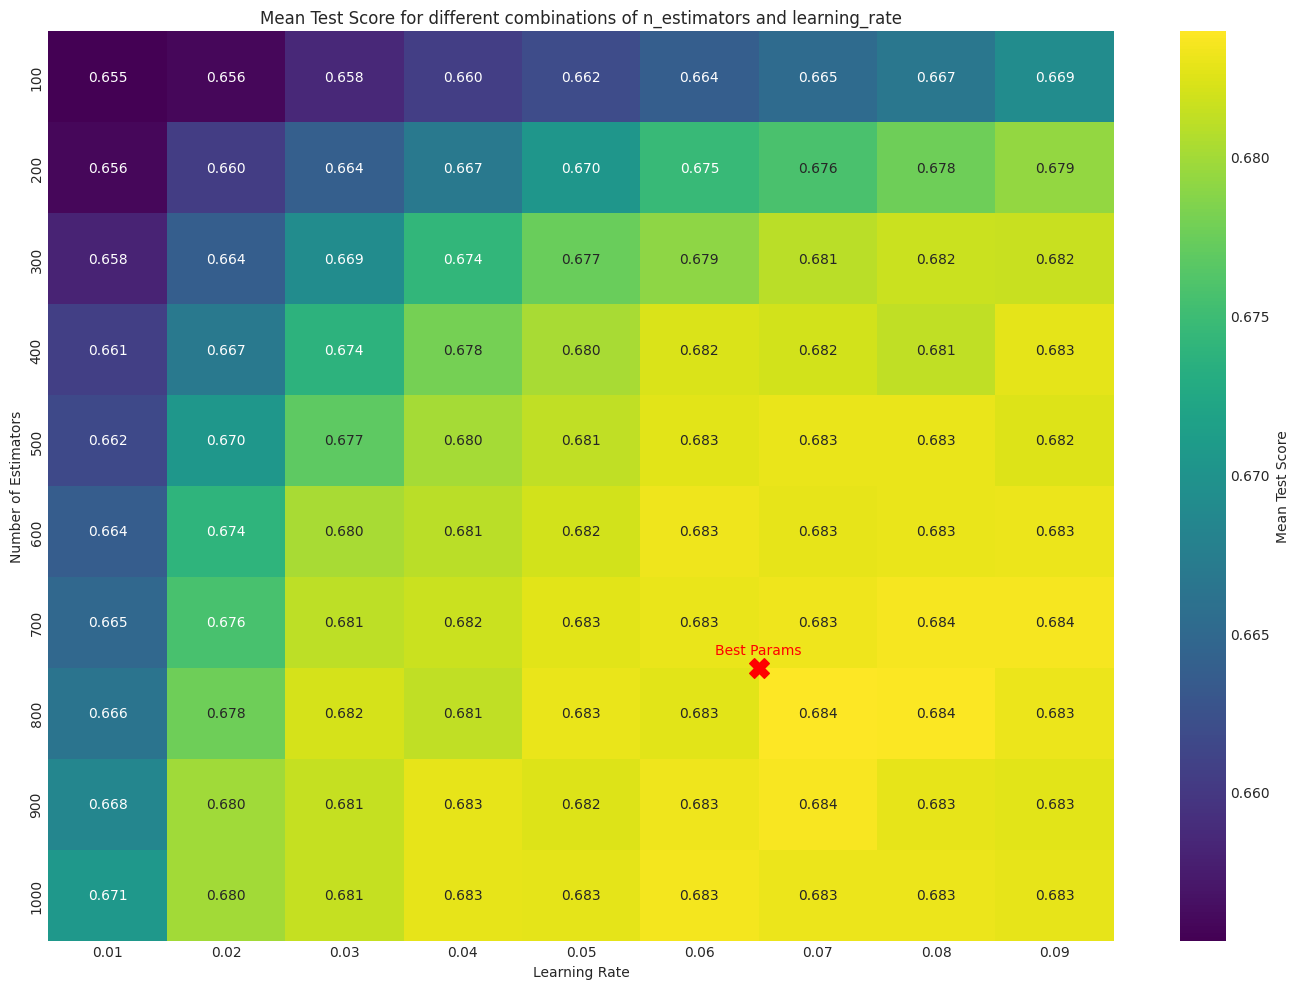

In [30]:
best_learning_rate =grid_search.best_params_['model__learning_rate']
best_n_estimators =grid_search.best_params_['model__n_estimators']
# Create the heatmap using seaborn with increased annotation precision
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Mean Test Score'})
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('Mean Test Score for different combinations of n_estimators and learning_rate')

# Highlight the best parameters on the heatmap
best_x = np.where(pivot.columns == best_learning_rate)[0][0]
best_y = np.where(pivot.index == best_n_estimators)[0][0]
plt.scatter(best_x, best_y, color='red', s=200, marker='X', zorder=2)

# Annotate the point with "Best Params"
ax.annotate('Best Params', (best_x, best_y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()


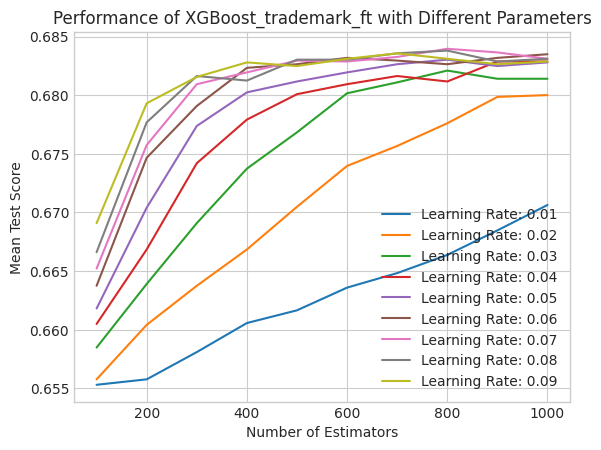

In [31]:
# 画折线图
import matplotlib.pyplot as plt

# 提取结果
n_estimators = results['param_n_estimators']
learning_rate = results['param_learning_rate']
scores = results['mean_test_score']

# 创建一个新的图形
fig, ax = plt.subplots()

# 对于每一个学习率，画一条折线图
for lr in learning_rate.unique():
    # 提取这个学习率的结果
    mask = learning_rate == lr
    ax.plot(n_estimators[mask], scores[mask], label=f'Learning Rate: {lr}')

# 添加图例和标签
ax.legend()
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Mean Test Score')
ax.set_title('Performance of XGBoost_trademark_ft with Different Parameters')

# 显示图形
plt.show()


# 以下是还没测试成功的可视化图

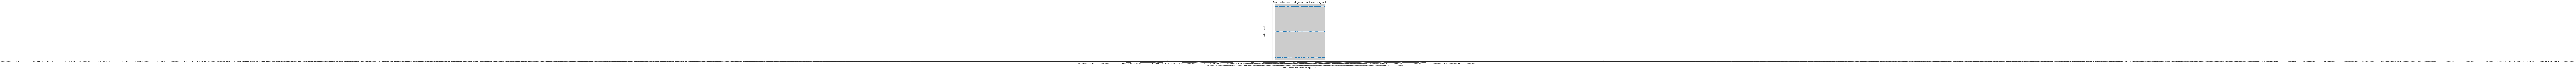

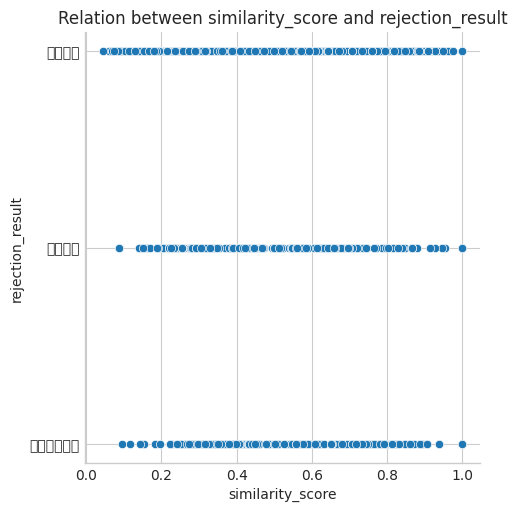

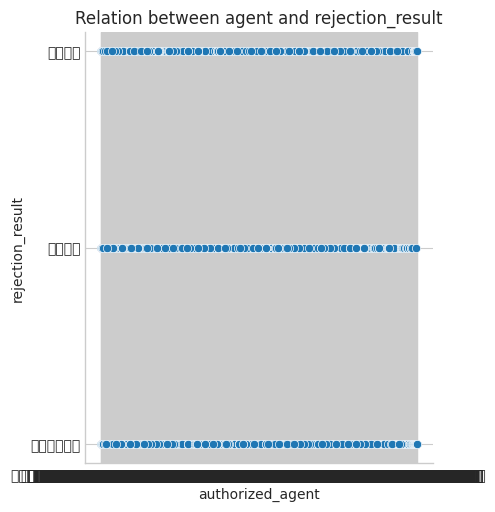

In [32]:
# Generating the relational plots
# Plot for main_reason vs rejection_result
sns.relplot(x="main_reason_for_review_by_applicant", y="rejection_result", data=data_cleaned)
plt.title("Relation between main_reason and rejection_result")
plt.show()

# Plot for cited_name vs rejection_result
sns.relplot(x="similarity_score", y="rejection_result", data=data_cleaned)
plt.title("Relation between similarity_score and rejection_result")
plt.show()

# Plot for applicant vs rejection_result
sns.relplot(x="authorized_agent", y="rejection_result", data=data_cleaned)
plt.title("Relation between agent and rejection_result")
plt.show()


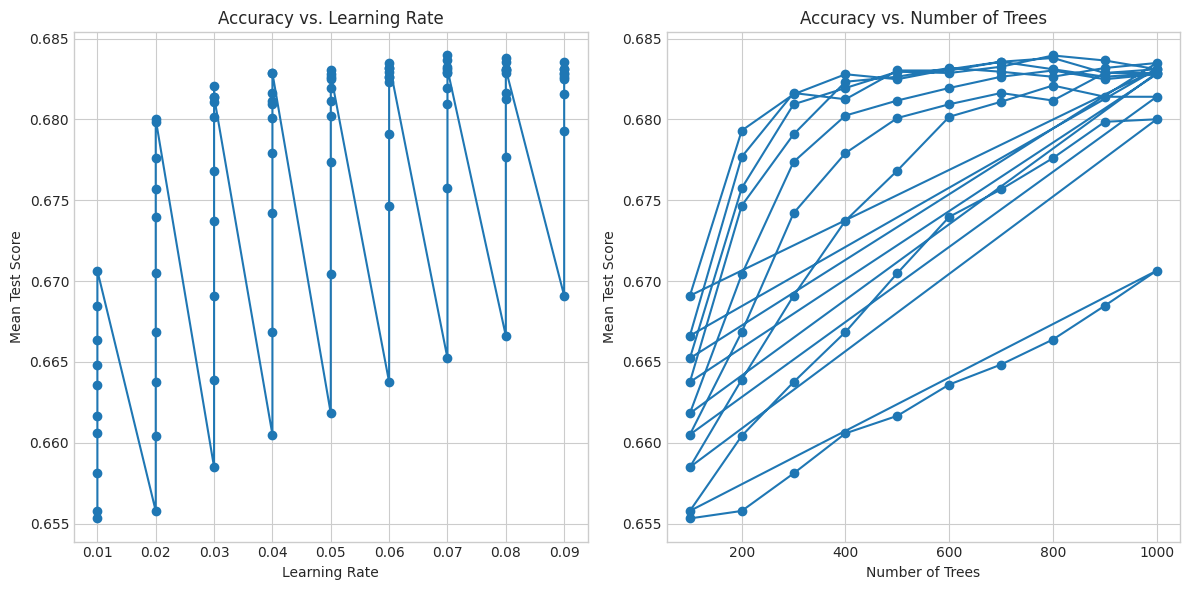

In [33]:
import matplotlib.pyplot as plt

# 提取得分数据
mean_test_scores = grid_search.cv_results_['mean_test_score']
learning_rates = [param['model__learning_rate'] for param in grid_search.cv_results_['params']]
n_estimators = [param['model__n_estimators'] for param in grid_search.cv_results_['params']]

# 绘制图形
plt.figure(figsize=(12, 6))

# 绘制准确率随学习率的变化
plt.subplot(1, 2, 1)
plt.plot(learning_rates, mean_test_scores, marker='o')
plt.title('Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')

# 绘制准确率随树的数量的变化
plt.subplot(1, 2, 2)
plt.plot(n_estimators, mean_test_scores, marker='o')
plt.title('Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

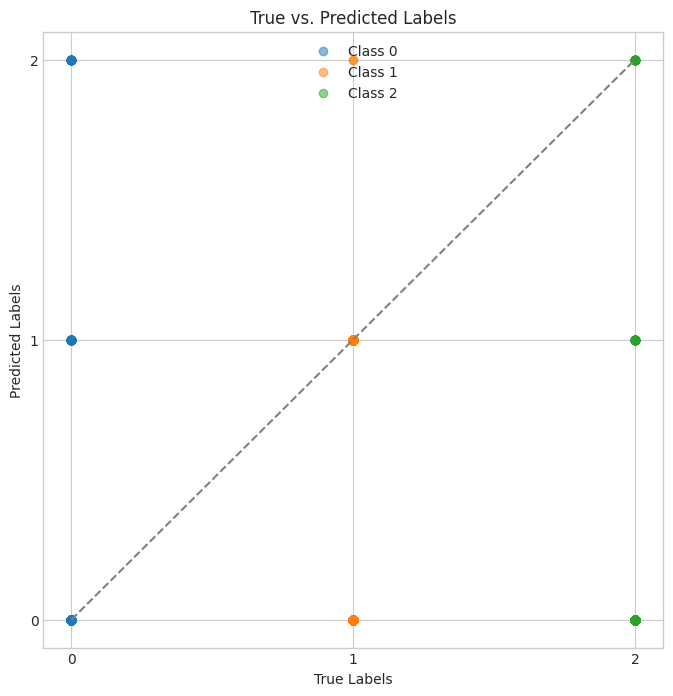

In [34]:
import matplotlib.pyplot as plt

# 预测值
y_pred = my_pipeline.predict(X_test)

# 绘制散点图
fig, ax = plt.subplots(figsize=(8, 8))

# 使用不同的颜色和标签为每个类绘制点
for label in [0, 1, 2]:
    mask = (y_test == label)
    ax.scatter(y_test[mask], y_pred[mask], label=f'Class {label}', alpha=0.5)

# 绘制对角线，表示预测完美的情况
ax.plot([0, 2], [0, 2], '--', color='gray')

ax.set_xlabel('True Labels')
ax.set_ylabel('Predicted Labels')
ax.set_title('True vs. Predicted Labels')
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.legend()
plt.show()


In [35]:
from sklearn.decomposition import PCA

# Step 1: Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.select_dtypes(exclude=["number"]).columns)
X_test_pca = pca.transform(X_test.select_dtypes(exclude=["number"]).columns)

# Step 2: Train a model on the transformed data
model_pca = XGBClassifier(n_jobs=-1, 
                          n_estimators=900, 
                          learning_rate=0.1,
                          tree_method='gpu_hist', 
                          gpu_id=0)
model_pca.fit(X_train_pca, y_train)

# Step 3: Plot decision boundary using the trained model and PCA transformed data

def plot_decision_boundary(model, X, y):
    """
    Plot the decision boundary of the model on data X and y.
    """
    # Create a mesh grid for the plot
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the class for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary on PCA Transformed Data')

# Plot the decision boundary using the PCA transformed test set
plot_decision_boundary(model_pca, X_test_pca, y_test)
plt.show()

ValueError: could not convert string to float: 'brandName'

In [ ]:
from sklearn.manifold import TSNE

# Use t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Plot the 2D representation of the data
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=50)
plt.colorbar()
plt.title('2D representation of the data using t-SNE')
plt.show()

In [ ]:
%pip install umap-learn

In [ ]:
import umap

# Use UMAP to reduce dimensions to 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)

# Plot the 2D representation of the data
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='viridis', s=50)
plt.colorbar()
plt.title('2D representation of the data using UMAP')
plt.show()


# 试验xgboost学习率按三角函数动态变化（自定义学习率回调函数）

学习率按三角函数变化:

XGBoost 本身不提供按三角函数变化的学习率策略。但您可以通过自定义学习率回调函数来实现这一功能。在每一轮的训练中，您可以根据三角函数来调整学习率。

动态输出验证集或训练集上的拟合效果:

使用 XGBoost 的 evals 参数，您可以在每一轮训练后输出模型在验证集或训练集上的效果。

三分类任务的损失函数:

对于三分类任务，您可以使用 XGBoost 的默认多分类损失函数 multi:softprob 或 multi:softmax。multi:softprob 会输出每个类的预测概率，而 multi:softmax 会输出预测的类标签。

In [ ]:
import xgboost as xgb
import numpy as np

# 定义三角函数调整学习率的回调函数
def lr_callback(n_boosting_round, num_boost_round):
    return 0.1 * np.sin(np.pi * n_boosting_round / num_boost_round)

# 训练数据
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# 参数
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'mlogloss'
}

# 训练模型
evals = [(dtrain, 'train'), (dvalid, 'valid')]
num_boost_round = 100
bst = xgb.train(params, dtrain, num_boost_round, evals=evals, 
                callbacks=[xgb.callback.reset_learning_rate(lr_callback)])


## 定义pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBRegressor, XGBClassifier, callback
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# # # Text columns to be transformed
# text_transformer = Pipeline(steps=[
#     ('tfidf', TfidfEmbedding())
# ])

# Assuming you've the Llama model loaded locally
# model_path = "../input/llama-2/pytorch/70b-chat-hf/1"
# model_path ="../input/bert/tensorflow2/zh-preprocess/3"

# # Text columns to be transformed using Llama
# text_transformer = Pipeline(steps=[
#     ('llama', LlamaEmbedding(model_path=model_path))
# ])

# Text columns to be transformed using Bert
# text_transformer = Pipeline(steps=[
#     ('bert', BertEmbedding())
# ])

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical data only, as categorical data has already been preprocessed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
#         ('text', text_transformer, 'brandName'),  # Example for 'brandName'. Repeat for other text columns if needed.
#        ('text', text_transformer, 'cited_brand_name'),
#         ('text', text_transformer, 'applicant'),
#         ('text', text_transformer, 'authorized_agent'),
#         ('text', text_transformer, 'applicant复审的主要理由'),
    ])

# 定义学习率调整函数
def lr_schedule(n_boosting_round, num_boost_round):
    return 0.1 * np.sin(np.pi * n_boosting_round / num_boost_round)

# XGBoost 参数
xgb_params = {
    'n_jobs': -1,
    'tree_method': 'gpu_hist',
    'gpu_id': 0,
    'learning_rate': 0.1  # 初始学习率，会被 lr_schedule 覆盖
}

# 定义模型
model = XGBClassifier(**xgb_params)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# 训练数据
# 假设您已经有了 X_train, y_train, X_valid, y_valid
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# 使用自定义学习率和评估数据集
evals = [(dtrain, 'train'), (dvalid, 'valid')]
num_boost_round = 100
bst = model.train(xgb_params, dtrain, num_boost_round, evals=evals, 
                  callbacks=[callback.reset_learning_rate(lr_schedule)])
